In [1]:
# Установить зависимости
%pip install -U scikit-learn pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB
      id      cuisine                                        ingredients
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3  22213       indian                [water, vegetable oil, wheat, salt]
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...


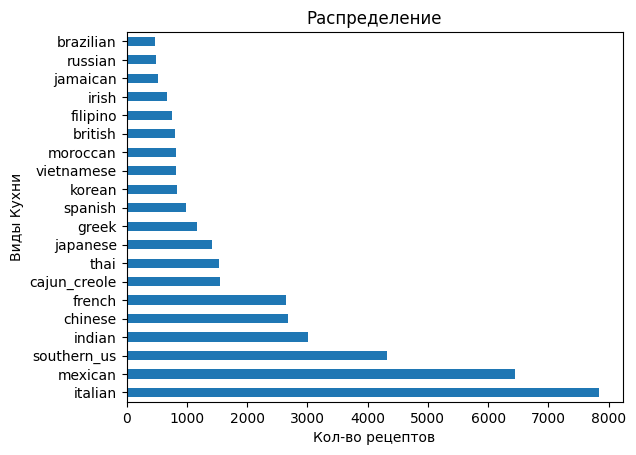

Метрики качества:
              precision    recall  f1-score   support

           0       0.78      0.61      0.68        84
           1       0.60      0.46      0.53       157
           2       0.75      0.64      0.69       328
           3       0.78      0.83      0.81       510
           4       0.69      0.57      0.62       136
           5       0.61      0.65      0.63       550
           6       0.74      0.71      0.73       249
           7       0.87      0.87      0.87       602
           8       0.62      0.50      0.56       151
           9       0.82      0.89      0.85      1567
          10       0.87      0.67      0.76        91
          11       0.78      0.76      0.77       284
          12       0.79      0.77      0.78       166
          13       0.90      0.93      0.92      1336
          14       0.83      0.74      0.78       166
          15       0.50      0.46      0.48        89
          16       0.70      0.76      0.73       848
         

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Прочитать датасет из JSON файла
df = pd.read_json('HW1_1_dataset.json')

# Вывод инфы про столбцы, недостающие значения, типы данных, а также несколько первых записей
df.info()
print(df.head())

# График распределения кухонь
cuisine_plt = df['cuisine'].value_counts().plot(kind='barh', title='Распределение', xlabel='Кол-во рецептов', ylabel='Виды Кухни')
plt.show()

# Удалить ненужный столбец id (axis=1 - столбец) и преобразовать массив строк в одну строку
df = df.drop("id", axis=1)
df['ingredients'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Признаки (X) - токинизированный перечень ингрииентов, целевая переменная (y) - тип кухни
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['ingredients'])
y = LabelEncoder().fit_transform(df['cuisine'])

# Разделить на тренировочкую (80%) и тестовую выборки (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Тренируем модель
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)

# Предсказываем
y_pred = classifier.predict(X_test)

# Проверка и анализ результатов
print('Метрики качества:')
print(classification_report(y_test, y_pred))
print(f"Точность модели: {accuracy_score(y_test, y_pred):.2f}")